<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: January 13 2020\
Author: Gede Candrayana Giri

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Import dataframe dan Library yang dibutuhkan

Untuk mencari datasate NYC property bisa akses ke [here](https://www.kaggle.com/new-york-city/nyc-property-sales) dan import ke dalam dataset anda

In [1]:
# Import library 
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm

In [2]:
# Load the dataset 
df = pd.read_csv('dataset/nyc-rolling-sales.csv')

print ('Data read into a pandas dataframe')

Data read into a pandas dataframe


untuk melihat 5 row teratas 5 pada dataset dengan menggunakan fungsi `head()`

In [3]:
# Show top 5 rows from the dataset
df.head()


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


dan untuk melihat 5 row terbawah dari dataset dapat menggunakan fungsi `tail()` 

In [4]:
# Show top 5 rows from the bottom of dataset
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: Kode digit untuk wilayah tempat properti itu berada; jika diurutkan akan seperti ini 
Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5)

untuk melihat dimensi dari dataframe , dapat menggunakan fungsi  `.shape` .hasilnya adalah: (84548, 22)

In [5]:
# Show the dimension of dataset
df.shape

(84548, 22)

berdasarkan dari offical statement di kaggle, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property". misalnya: rel kereta api MTA yang dapat melintasi sebagian dari properti lain" . Begitu juga untuk kolom Unnamed tidak disebutkan dan kemungkinan besar digunakan untuk iterasi melalui record. Jadi, kedua kolom itu dihapus untuk saat ini.


In [6]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
df=df.drop(columns=['Unnamed: 0', 'EASE-MENT'])
df


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


untuk melihat info dari dataframe dapat menggunakan fungsi `.info()` 

In [7]:
#View the data type from each variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

Sepertinya record kosong tidak dilabel sebagai NA. jadi harus mengonversi kolom ke tipe data yang sesuai untuk mendapatkan NA.

In [8]:
#First, let's check which columns should be categorical
print('SALE DATE')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

SALE DATE
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [10]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Setelah melakukan pengecekan data yang kosong ternyata sekitar 30% GROSS SF dan LAND SF hilang. Selain itu, sekitar 17% dari SALE PRICE juga hilang.

Kita dapat mengisi nilai yang hilang dari satu kolom ke kolom lainnya, yang akan membantu kita mengurangi nilai yang hilang. Nilai yang diharapkan:

(6, 20)

(1366, 20)

In [11]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


Ada 1372 baris yang dapat diisi dengan nilai

In [12]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [13]:
#  Check for duplicates before

print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


Dari dataframe ternyata memiliki 765 baris duplikat (tidak termasuk baris asli).

In [14]:
df.drop_duplicates(inplace=True) #recheck duplicate

print(sum(df.duplicated()))

0


## Exploratory data analysis

Sekaran, kita mencoba untuk mendeskripsikan data dengan fungsi`.describe()` untuk fitur `COMMERCIAL UNITS` 

In [15]:
#Show descriptive statistics from each variables when commercial unit is 0

df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Mari kita coba memahami kolomnya. Tabel di atas menunjukkan statistik deskriptif untuk kolom numerik.

- Ada kode pos dengan nilai 0
- Dapatkah nomor blok / lot naik hingga 16322?
- Sebagian besar properti memiliki 2 unit dan maksimum 1844 unit?mungkin berarti beberapa perusahaan membeli sebuah gedung. Ini harus diperlakukan sebagai outliers.
- Kolom lain juga memiliki outliers yang perlu diselidiki lebih lanjut.
- Kolom tahun memiliki tahun dengan 0
- Sebagian besar harga jual kurang dari 10.000 dapat diperlakukan sebagai hadiah atau biaya transfer.




Sekarang, mari kita dapatkan statistik deskriptif sederhana dengan fungsi `.describe ()` untuk fitur `RESIDENTIAL UNITS`.

Function below are graded function. (1 Points)

In [16]:
#Show descriptive statistics from each variables when residential unit is 0

df[df['RESIDENTIAL UNITS']==0].describe()


,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,9.503000e+03,24546.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,8.870466e+03,1675.525788,1.632257e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,7.890877e+04,679.095000,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,2.500000e+03,1962.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


# Insight :


- Ada 0 nilai dalam Kode Pos dan Unit Komersial.
- Ada 24546 borough jika unit hunian adalah 0.
- Luas tanah kaki persegi satuan rumah = 0 lebih besar dari satuan komersial Tanah kaki persegi = 0
- Ada 24546 data yang memiliki 0 unit hunian.



Gunakan fungsi `.value_counts` untuk menghitung nilai total fitur` BOROUGH`. Nilai yang diharapkan sebagai berikut:



In [31]:
# Syntax to count value for each borough in NYC Property data 

df['BOROUGH'].value_counts()
#And the result is same as expected value

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

# Mean for each Borough


Mean adalah rata-rata dari suatu kumpulan data yang ditemukan dengan menambahkan semua angka dalam kumpulan data tersebut dan kemudian membaginya dengan jumlah nilai dalam kumpulan tersebut.

In [18]:
block_mean=df.groupby(['BOROUGH']).agg(MEAN= pd.NamedAgg('BLOCK',np.mean))
block_mean


,MEAN
BOROUGH,
1,1107.657938
2,4202.934372
3,4317.583484
4,6630.747589
5,3261.786162


# Median for each Borough

Median adalah angka tengah dalam urutan, mulai dari paling atas atau menurun.


In [19]:
block_median=df.groupby(['BOROUGH']).agg(MEDIAN= pd.NamedAgg('BLOCK',np.median))
block_median


,MEDIAN
BOROUGH,
1,1170.0
2,4177.5
3,4558.0
4,5900.0
5,3024.0


# Mode for each Borough

Mode adalah istilah statistik yang mengacu pada bilangan yang paling sering muncul yang ditemukan dalam satu set bilangan

In [20]:
block_modus=df.groupby(['BOROUGH']).agg(MODUS= pd.NamedAgg('BLOCK',stats.mode))
block_modus


,MODUS
BOROUGH,
1,16
2,3944
3,2135
4,5066
5,2450


# Range for each Borough


Range adalah perbedaan antara nilai terendah dan tertinggi.

In [21]:
block_range=df.groupby(['BOROUGH']).agg(RANGE= pd.NamedAgg('BLOCK',np.ptp))
block_range


,RANGE
BOROUGH,
1,2243
2,3692
3,8954
4,16309
5,8049


# Variance for each Borough

variance adalah ekspektasi deviasi kuadrat variabel acak dari meannya

In [22]:
block_variance=df.groupby(['BOROUGH']).agg(VARIANCE= pd.NamedAgg('BLOCK',np.var))
block_variance


,VARIANCE
BOROUGH,
1,2.886372e+05
2,1.116755e+06
3,7.335413e+06
4,1.872519e+07
5,5.377588e+06


# SD for each Borough

 standard deviation adalah ukuran jumlah variasi atau penyebaran sekumpulan nilai.

In [23]:
block_stdev=df.groupby(['BOROUGH']).agg(Standard_Deviation= pd.NamedAgg('BLOCK',np.std))
block_stdev


,Standard_Deviation
BOROUGH,
1,537.249675
2,1056.766385
3,2708.396811
4,4327.260807
5,2318.962697


# Probability Distibution

Function below are graded function. (1 Points)

Text(0.5, 1.05, 'Probability Distribution of Block of NYC Property Sales')

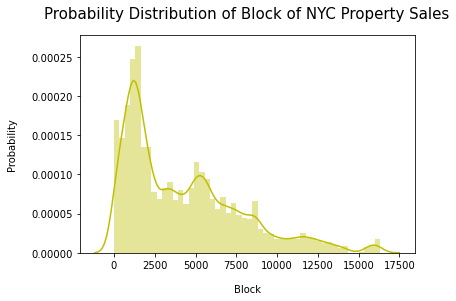

In [24]:
sns.distplot(df["BLOCK"], color="y")
plt.xlabel("Block", labelpad=14)
plt.ylabel("Probability", labelpad=14)
plt.title("Probability Distribution of Block of NYC Property Sales", fontsize=15, y=1.05)

# Confidence Intervals

Function below are graded function. (1 Points)

In [25]:
df.groupby('BOROUGH').aggregate({"BLOCK":[np.mean,np.std,np.size]})

BLOCK                    
                mean          std   size
BOROUGH                                 
1        1107.657938   537.249675  18102
2        4202.934372  1056.766385   6994
3        4317.583484  2708.396811  23843
4        6630.747589  4327.260807  26548
5        3261.786162  2318.962697   8296

In [26]:
mean_borough_5 = 3261.786162
std_borough_5 = 2318.962697
n_borough_5 = 8296
z = 1.96

stderr_borough_5 = std_borough_5 / np.sqrt(n_borough_5)
print("Standard error mean of block in borough 5 :", stderr_borough_5)

Standard error mean of block in borough 5 : 25.460058131085894


In [27]:

def compute_CI(estimate, stderr, z_score=1.96):
    return (
        estimate - z_score*stderr,
        estimate + z_score*stderr
    )


In [28]:
lower_ci, upper_ci = compute_CI(mean_borough_5, stderr_borough_5)
print(f"CI for  block that located in borough 5: [{lower_ci:.3f}, {upper_ci:.3f}]")

CI for  block that located in borough 5: [3211.884, 3311.688]


# Hypothesis Testing 

Function below are graded function. (1 Points)

In [29]:
n_borough_4 = df[df["BOROUGH"] == 4]
n_borough_5 = df[df["BOROUGH"] == 5]

sm.stats.ztest(n_borough_4.BLOCK.dropna(), n_borough_5.BLOCK.dropna(), alternative="two-sided")

(67.92858775655891, 0.0)

- Ho = µ Borough 4 = µ Borough 5 
- H1 = µ Borough 4 ≠ µ Borough 5 

# Conclusion: 
 z-test value > $\alpha$ menghasilkan nilai yang bertolak belakang dengan hipotesis nol, sehingga kita dapat mengatakan bahwa rata-rata Borough 4 tidak sama dengan Borough 5.
